In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'2.0.0rc0'

In [3]:
pl.__version__

'0.16.11'

In [4]:
from datetime import datetime
from tqdm import tqdm
def time_stamp():
    return datetime.now()

### Using Numpy as Pandas Backend

In [6]:
%%timeit
#using numpy
df_numpy = pd.read_csv('./flights.csv')

<magic-timeit>:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.


6.28 s ± 88.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Using Arrow as Pandas Backend

In [5]:
%%timeit
#using arrow
df_arrow = pd.read_csv('./flights.csv',
                      engine='pyarrow')

1.86 s ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Using Polars

In [5]:
%%timeit
#using arrow
df_polars = pl.read_csv('./flights.csv', rechunk=False)

3.01 s ± 84.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Using Polars with Pyarrow

In [5]:
%%timeit
#using arrow
df_polars = pl.read_csv('./flights.csv', use_pyarrow=True, rechunk=False)

1.29 s ± 70.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Creating dataframe of timelapse

In [6]:
dict_elapsed_time = {
    "pandas with numpy": 6.28,
    "pandas with arrow": 1.75,
    "polars": 3.01,
    "polars with arrow": 1.29
}

df_timelapse = pd.DataFrame(dict_elapsed_time, index=range(1))

df_timelapse

,pandas with numpy,pandas with arrow,polars,polars with arrow
0,6.28,1.75,3.01,1.29


/var/folders/k3/rq3y45b92kbf6vtf128q_99r0000gn/T/ipykernel_48740/2112410932.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


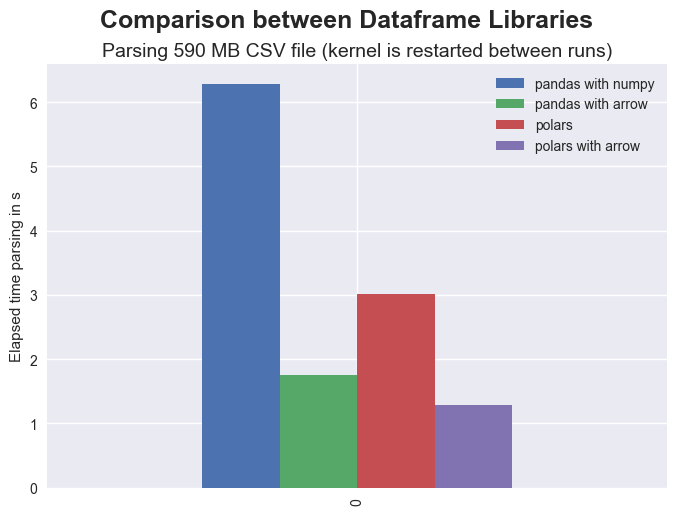

In [7]:
plt.style.use("seaborn")
df_timelapse.plot(
    kind='bar', ylabel='Elapsed time parsing in s',
    # colormap='tab10',
)
plt.suptitle("Comparison between Dataframe Libraries", fontsize=18, fontweight ='bold')
plt.title("Parsing 590 MB CSV file (kernel is restarted between runs)", fontsize=14)
plt.show()